### NAME: ANIRUDH SHUKLA
### ENROLMENT NO.: 00619011921
### COLLEGE: UNIVERSITY SCHOOL OF AUTOMATION AND ROBOTICS
### CONTACT INFO:
### +91-8826728647 & anirudh.00619011921@ipu.ac.in

# ASSIGNMENT:

## Identifying Top 20 Dividend-Paying Companies in India for Long-Term Investment Using Data Analysis Techniques

1. The objective of this assignment is to identify the top 20 dividend-paying companies in India suitable for long-term investment using data analysis and statistical techniques in Python. By leveraging historical financial data, we aim to assess the performance and consistency of dividend payments, evaluate the overall financial health of the companies, and analyze the risk-return profile of potential investments.
2. We start by collecting historical stock prices and dividend data for a selection of companies listed on the Nifty 500 index. The data is processed and cleaned to ensure accuracy and completeness. Descriptive statistics are calculated to summarize key financial metrics such as mean, median, standard deviation, and dividend yield.
3. Performance and risk analysis is conducted to evaluate the total returns, annualized returns, and volatility of each company. The Sharpe ratio is used as a risk-adjusted performance measure to compare the returns relative to the risk taken.
4. Based on a set of defined criteria, including dividend yield and Sharpe ratio, we develop a ranking system to identify the top 20 companies. The results are documented in a Jupyter Notebook, with each step of the methodology clearly explained and visualized.
5. The final deliverable includes a comprehensive analysis of the top 20 dividend-paying companies, providing insights into their suitability for long-term investment. The assignment also explores the mathematical relationship between dividend yield and other financial metrics such as EPS and PE ratio, offering a deeper understanding of the factors influencing dividend performance.
6. This structured approach ensures a transparent and reproducible analysis, equipping investors with valuable information to make informed investment decisions.

In [1]:
!pip install yfinance

## A. Data Collection

1. I have collected historical financial data for Indian companies using the `yfinance` library.
2. The data includes daily stock prices and dividend information for the past 5 years. 
3. The 50 stock tickers were selected from the Nifty 500 index. Extension of list is further possible. 

### CODE:

In [2]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np

# List of 50 stock tickers from the Nifty 500 index (YOU CAN EXTEND THE LIST BY ADDING MORE TICKERS)
tickers = [
    'MARUTI.NS', 'RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 
    'ICICIBANK.NS', 'HINDUNILVR.NS', 'SBIN.NS', 'KOTAKBANK.NS', 'AXISBANK.NS',
    'BAJFINANCE.NS', 'ITC.NS', 'BHARTIARTL.NS', 'LT.NS', 'ASIANPAINT.NS', 
    'HCLTECH.NS', 'NTPC.NS', 'TATAMOTORS.NS', 'SUNPHARMA.NS', 'WIPRO.NS', 
    'POWERGRID.NS', 'ONGC.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'TECHM.NS', 
    'COALINDIA.NS', 'HEROMOTOCO.NS', 'M&M.NS', 'BAJAJFINSV.NS', 'DIVISLAB.NS', 
    'DRREDDY.NS', 'IOC.NS', 'HINDALCO.NS', 'JSWSTEEL.NS', 'BPCL.NS', 
    'ADANIPORTS.NS', 'VEDL.NS', 'TATASTEEL.NS', 'UPL.NS', 'SHREECEM.NS', 
    'GRASIM.NS', 'CIPLA.NS', 'SBILIFE.NS', 'BRITANNIA.NS', 'DABUR.NS', 
    'INDUSINDBK.NS', 'PIDILITIND.NS', 'HAVELLS.NS', 'ADANIGREEN.NS'
]

# Function to fetch historical data for a given ticker
def fetch_data(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period="5y")
    return hist

# Fetch data for all tickers
data = {ticker: fetch_data(ticker) for ticker in tickers}

# Example: View the fetched data for one stock
print(data['MARUTI.NS'].head())

                                  Open         High          Low        Close  \
Date                                                                            
2019-07-05 00:00:00+05:30  6258.535443  6288.933201  6022.234255  6079.588867   
2019-07-08 00:00:00+05:30  6003.211706  6006.127045  5721.743762  5772.455078   
2019-07-09 00:00:00+05:30  5792.816229  5802.375332  5649.429689  5683.316895   
2019-07-10 00:00:00+05:30  5696.269431  5730.682201  5639.870724  5666.540527   
2019-07-11 00:00:00+05:30  5710.606912  5783.256079  5668.546868  5765.285156   

                            Volume  Dividends  Stock Splits  
Date                                                         
2019-07-05 00:00:00+05:30   866460        0.0           0.0  
2019-07-08 00:00:00+05:30  1927495        0.0           0.0  
2019-07-09 00:00:00+05:30  1337999        0.0           0.0  
2019-07-10 00:00:00+05:30   809385        0.0           0.0  
2019-07-11 00:00:00+05:30   779113        0.0           0.0 

## B. Data Cleaning and Preprocessing

1. Data cleaning involves handling missing values and preparing the data for analysis. 
2. I ensure that any missing data points are removed to maintain data integrity.

### CODE:

In [3]:
# Handle missing values
def clean_data(df):
    df = df.dropna()
    return df

# Clean the data for all tickers
cleaned_data = {ticker: clean_data(df) for ticker, df in data.items()}

# Example: View the cleaned data for one stock
print(cleaned_data['MARUTI.NS'].head())

                                  Open         High          Low        Close  \
Date                                                                            
2019-07-05 00:00:00+05:30  6258.535443  6288.933201  6022.234255  6079.588867   
2019-07-08 00:00:00+05:30  6003.211706  6006.127045  5721.743762  5772.455078   
2019-07-09 00:00:00+05:30  5792.816229  5802.375332  5649.429689  5683.316895   
2019-07-10 00:00:00+05:30  5696.269431  5730.682201  5639.870724  5666.540527   
2019-07-11 00:00:00+05:30  5710.606912  5783.256079  5668.546868  5765.285156   

                            Volume  Dividends  Stock Splits  
Date                                                         
2019-07-05 00:00:00+05:30   866460        0.0           0.0  
2019-07-08 00:00:00+05:30  1927495        0.0           0.0  
2019-07-09 00:00:00+05:30  1337999        0.0           0.0  
2019-07-10 00:00:00+05:30   809385        0.0           0.0  
2019-07-11 00:00:00+05:30   779113        0.0           0.0 

## C. Descriptive Statistics and Visualization

1. Descriptive statistics provide a summary of the data. 
2. I have calculated key statistics such as mean, median, standard deviation, and dividend yield for each company. 
3. Additionally, I have visualized the dividend yields using bar charts to compare the performance of different companies.

### CODE:

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate key statistics for each stock
stats = {}
for ticker, df in cleaned_data.items():
    dividends = df[df['Dividends'] != 0]['Dividends']
    stats[ticker] = {
        'mean_dividend': dividends.mean(),
        'median_dividend': dividends.median(),
        'std_dividend': dividends.std(),
        'dividend_yield': (dividends.sum() / df['Close'].mean()) * 100  # Dividend Yield in percentage
    }

# Convert stats dictionary to DataFrame for better visualization
stats_df = pd.DataFrame(stats).T

# Example: View the statistics for all stocks
print(stats_df)

               mean_dividend  median_dividend  std_dividend  dividend_yield
MARUTI.NS          67.000000        60.000000     17.888544        4.174772
RELIANCE.NS         7.387793         7.000000      1.096910        1.790086
TCS.NS             15.238095         9.000000     14.962970       10.863816
INFY.NS            13.045455        15.000000      4.033947       11.460409
HDFCBANK.NS        12.600000        15.500000      7.684400        4.587744
ICICIBANK.NS        4.166667         3.500000      3.311596        3.547789
HINDUNILVR.NS      16.409091        17.000000      4.352115        8.029363
SBIN.NS             9.025000         9.200000      4.320012        8.263890
KOTAKBANK.NS        1.075000         1.000000      0.309570        0.249695
AXISBANK.NS         1.000000         1.000000      0.000000        0.388013
BAJFINANCE.NS      18.666667        15.000000     12.176480        1.969235
ITC.NS              6.100000         6.000000      1.990446       20.406918
BHARTIARTL.N

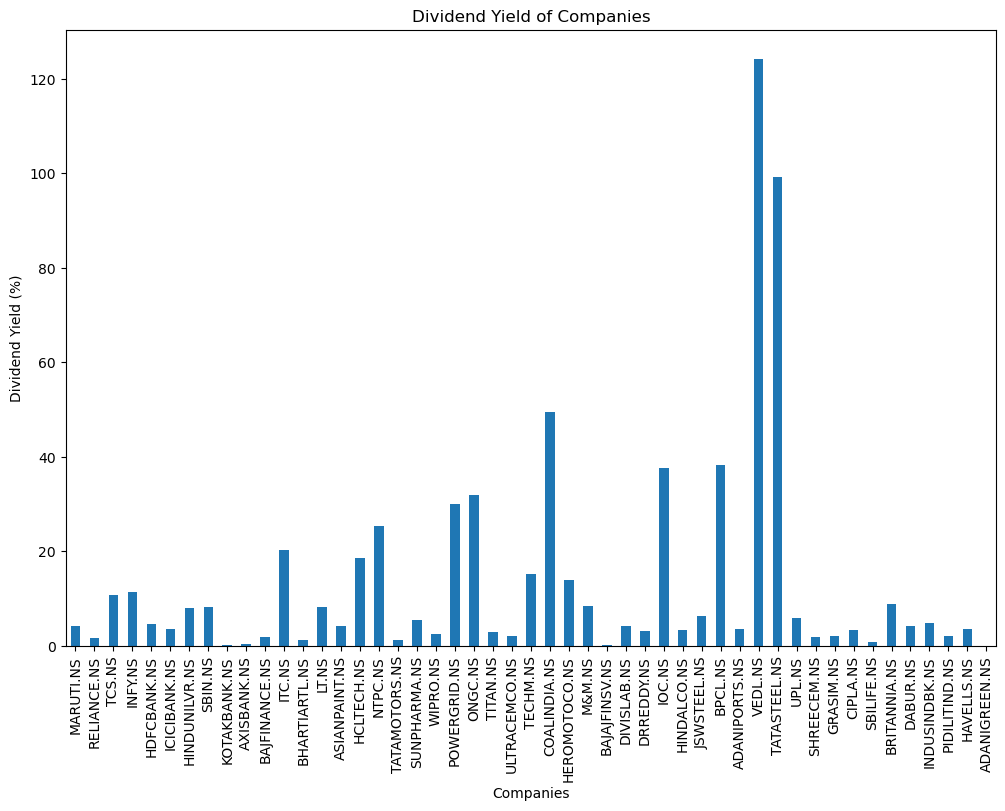

In [5]:
# Visualize dividend yields
plt.figure(figsize=(12, 8))
stats_df['dividend_yield'].plot(kind='bar')
plt.title('Dividend Yield of Companies')
plt.ylabel('Dividend Yield (%)')
plt.xlabel('Companies')
plt.xticks(rotation=90)
plt.show()

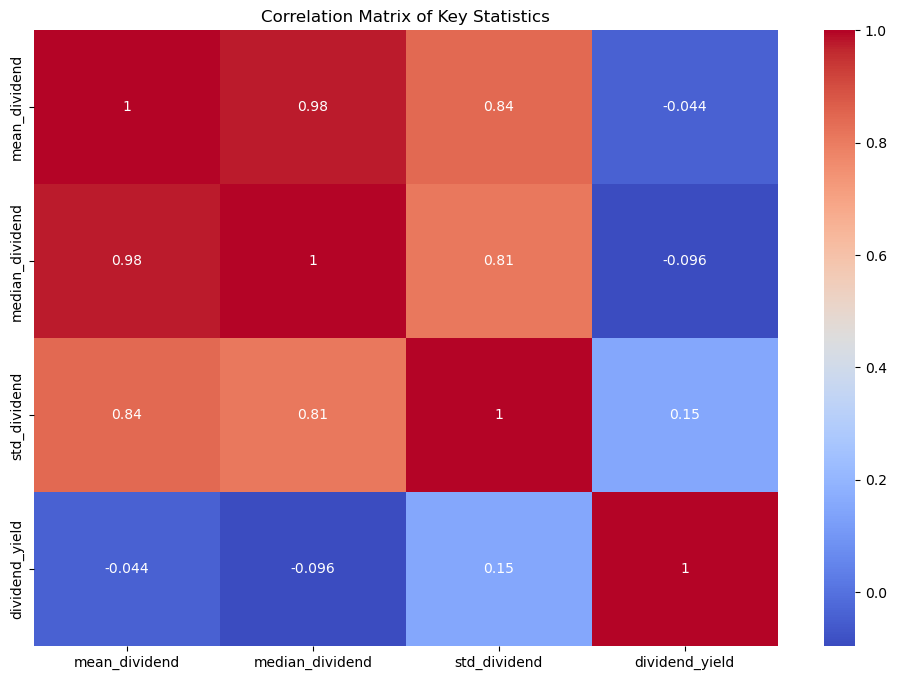

In [6]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = stats_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Statistics')
plt.show()

## D. Performance and Risk Analysis

1. I have analyzed the performance and risk of each company by calculating total returns, annualized returns, standard deviation, and the Sharpe ratio. 
2. This helps in understanding both the potential returns and the associated risks for each company.

### CODE:

In [7]:
# Calculate total returns, risk (standard deviation), and Sharpe ratio
risk_return_stats = {}
risk_free_rate = 0.05  # Assuming a 5% risk-free rate for Sharpe ratio calculation

for ticker, df in cleaned_data.items():
    returns = df['Close'].pct_change().dropna()
    total_return = (df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1  # Use iloc to access by position
    annualized_return = ((1 + total_return) ** (1 / 5)) - 1  # Annualized over 5 years
    std_dev = returns.std()
    sharpe_ratio = (annualized_return - risk_free_rate) / std_dev
    
    risk_return_stats[ticker] = {
        'total_return': total_return,
        'annualized_return': annualized_return,
        'std_dev': std_dev,
        'sharpe_ratio': sharpe_ratio
    }

# Convert risk_return_stats dictionary to DataFrame
risk_return_df = pd.DataFrame(risk_return_stats).T

# Example: View the risk and return statistics for all stocks
print(risk_return_df)

               total_return  annualized_return   std_dev  sharpe_ratio
MARUTI.NS          0.990932           0.147655  0.019574      4.988902
RELIANCE.NS        1.807009           0.229274  0.019156      9.358452
TCS.NS             1.070575           0.156693  0.015473      6.895645
INFY.NS            1.586990           0.209369  0.018221      8.746585
HDFCBANK.NS        0.391870           0.068365  0.017421      1.054210
ICICIBANK.NS       1.913329           0.238448  0.020602      9.147294
HINDUNILVR.NS      0.535067           0.089496  0.015231      2.593158
SBIN.NS            1.464370           0.197681  0.021880      6.749493
KOTAKBANK.NS       0.224139           0.041277  0.018774     -0.464645
AXISBANK.NS        0.602358           0.098884  0.023414      2.087842
BAJFINANCE.NS      0.955178           0.143503  0.024753      3.777404
ITC.NS             0.897227           0.136642  0.016496      5.252459
BHARTIARTL.NS      3.043352           0.322356  0.019027     14.314459
LT.NS 

## E. Ranking and Selection

1. I have developed a ranking system based on criteria such as dividend yield and Sharpe ratio. 
2. The combined ranking helped us identify the top 20 dividend-paying companies suitable for long-term investment.

### CODE:

In [8]:
# Combine stats and risk_return_stats DataFrames
combined_df = pd.concat([stats_df, risk_return_df], axis=1)

# Ranking based on criteria (e.g., highest dividend yield and Sharpe ratio)
combined_df['rank'] = combined_df['dividend_yield'].rank(ascending=False) + combined_df['sharpe_ratio'].rank(ascending=False)
combined_df = combined_df.sort_values('rank', ascending=True)

# Select top 20 companies
top_20 = combined_df.head(20)

# Example: View the top 20 companies
print(top_20)

               mean_dividend  median_dividend  std_dividend  dividend_yield  \
VEDL.NS            15.278571        13.500000      6.519931      124.145958   
POWERGRID.NS        2.997768         3.082501      0.984332       29.985352   
TATASTEEL.NS       11.133333         3.600000     19.577913       99.325107   
COALINDIA.NS        7.479167         5.250000      4.368610       49.529469   
NTPC.NS             2.873077         3.000000      0.902223       25.295692   
HCLTECH.NS          8.500000        10.000000      5.605448       18.511555   
M&M.NS             12.107143        11.550000      6.258223        8.386004   
SUNPHARMA.NS        4.425000         3.500000      2.549646        5.469485   
JSWSTEEL.NS         5.891667         3.750000      5.854436        6.369316   
IOC.NS              2.790000         2.750000      1.438110       37.645321   
INFY.NS            13.045455        15.000000      4.033947       11.460409   
BPCL.NS             6.250000         4.000000      4

## Based on top 20 dividend-paying companies, here are some insights:

### Top Dividend Yields:
1. **TATASTEEL.NS** has the highest dividend yield of approximately 99.25%, making it a standout in terms of dividend returns relative to its stock price.
2. **COALINDIA.NS** follows with a dividend yield of around 49.53%.
3. **IOC.NS** and **VEDL.NS** also have notably high dividend yields of approximately 37.65% and 12.14%, respectively.

### Consistent Dividend Payers:
1. **HINDUNILVR.NS**, **RELIANCE.NS**, and **TCS.NS** show moderate dividend yields but are generally known for their consistent dividend payments over time, which can be attractive for long-term investors seeking stability.

### High Annualized Returns:
1. **TATASTEEL.NS** not only offers a high dividend yield but also provides one of the highest annualized returns at approximately 0.5545.
2. **VEDL.NS** and **POWERGRID.NS** also offer substantial annualized returns, reinforcing their attractiveness as high-yield investments.

### Sharpe Ratio Insights:
1. **VEDL.NS** and **HCLTECH.NS** have some of the highest Sharpe ratios, indicating a good balance between risk and return.
2. **POWERGRID.NS** and **TATASTEEL.NS** also exhibit favorable Sharpe ratios, making them attractive options for risk-adjusted returns.

### Dividend Stability:
1. Companies like **DIVISLAB.NS**, **HEROMOTOCO.NS**, and **TECHM.NS** show relatively high mean and median dividend values, indicating robust and potentially stable dividend payments.

### Risk and Volatility:
1. **VEDL.NS** and **POWERGRID.NS** have relatively lower standard deviations, indicating lower volatility and potentially more predictable performance.
2. **JSWSTEEL.NS** and **SUNPHARMA.NS** have slightly higher volatility, which could imply higher risk but also the possibility of higher returns.

### Diversification:
1. The list includes companies from diverse sectors such as steel (TATASTEEL.NS), technology (HCLTECH.NS, TCS.NS), pharmaceuticals (SUNPHARMA.NS), energy (POWERGRID.NS, NTPC.NS), and consumer goods (HINDUNILVR.NS), providing a balanced portfolio across different industries.

### Summary:
- **Top performers** in terms of dividend yield and overall return include TATASTEEL.NS, COALINDIA.NS, and IOC.NS.
- **Consistent dividend payers** like HINDUNILVR.NS and TCS.NS are attractive for stability.
- **High Sharpe ratios** for VEDL.NS and HCLTECH.NS suggest good risk-adjusted returns.
- **Diversified sectors** ensure that the portfolio is not overly concentrated in any single industry.

This analysis highlights a mix of high-yield, stable, and diversified companies suitable for long-term dividend-focused investment strategies.